## 3.1
### Task 1

In [2]:
head(mtcars, 3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


In [3]:
cor.test(x = mtcars$mpg, y = mtcars$hp)


	Pearson's product-moment correlation

data:  mtcars$mpg and mtcars$hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


In [13]:
install.packages('psych')
library('psych')

cr <- corr.test(mtcars[, c(1,5)])

Installing package into ‘/home/nizhikebinesi/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [23]:
# коэффициент корреляции
array(cr$r)[2]

[1] 0.6811719

In [24]:
# p-value
array(cr$p)[2]

[1] 1.77624e-05

In [25]:
corr.calc <- function(x){
    library('psych')
    cr <- corr.test(x)
    return ( c(array(cr$r)[2], array(cr$p)[2]) )
}

In [26]:
corr.calc(mtcars[, c(1,5)])

[1] 0.6811719078 0.0000177624

### Task 2

In [4]:
url <- "https://stepic.org/media/attachments/lesson/11504/step6.csv"
dest <- 'step6.csv'

In [5]:
download.file(url = url, destfile = dest)

In [6]:
step6 <- read.table("step6.csv",  header=TRUE, sep=',')

In [7]:
library('psych')

In [9]:
head(step6, 5)

V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
TY2PWH,-16.633,-11.830,9FL3MI,14.197,-116.628,38RT18,-4.531,-14.234,21.701,12.736,JG0IUG,48.110,38.352
Y3D6ZU,8.646,3.066,B5BPAL,-31.837,-3.290,N9GKKB,-22.311,107.117,26.253,3.109,DAJ7P0,0.942,75.388
CRW2OZ,17.355,-13.517,L6QJXI,56.945,-51.174,WCAYX5,-17.371,-26.932,52.735,-8.870,Z87TIP,3.419,149.406
26DOSM,-24.280,39.919,8360S6,11.424,-16.051,CRKYZB,47.055,15.509,-96.000,23.039,VX0ZZC,43.498,95.207
BYEWCV,31.736,24.103,NVYKT3,7.096,-38.985,ZMQOD7,-0.576,-80.631,142.549,6.685,GOIUSH,-39.280,-108.598


In [42]:
filtered.cor <- function(x) {
    zero_diag <- function(xx) {
        for (i in 1:nrow(xx)) {
            xx[i, i] = 0
        }
        xx
    }
    
    library('psych')
    
    types <- sapply(x, class)
    columns <- which(types == "numeric")
    df <- x[ , columns]
    corrs <- zero_diag(corr.test(df)$r)
    
    answ1 <- max(corrs)
    answ2 <- min(corrs)
    
    res <- ifelse(abs(answ1) > abs(answ2), answ1, answ2)
    
    res
}

In [43]:
xx <- filtered.cor(step6)

In [44]:
xx

[1] 0.235997

### Task 3

In [46]:
test_data  <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv")

In [47]:
head(test_data)

col1,col2
0.78,-0.49
0.25,1.32
0.93,0.04
-1.16,-0.98
-1.84,1.31
1.71,0.41


In [150]:
smart_cor <- function(x) {
    get_cond <- function(x) {
        alpha = 0.05
        shapiro.test(x[[1]])$p.value < alpha || shapiro.test(x[[2]])$p.value < alpha
    }
    
    s <- ifelse(get_cond(x), 'spearman', 'pearson')
    res <- cor.test(x[[1]], x[[2]], method = s)$estimate
    
    res
}

In [151]:
y <- smart_cor(test_data)

In [152]:
y

cor 
-0.1031003

### Task 4

In [173]:
name <- 'dataset_11508_12.txt'

In [174]:
df <- read.table(name, sep='' )

In [175]:
head(df, 2)

V1,V2
0.032,-0.605
-1.823,3.751


In [176]:
fit <- lm(df[ , 1]~ df[ , 2], df)

In [177]:
as.numeric(fit$coefficients)

[1] -0.2253768 -0.4259453

### Task 5

In [178]:
library('ggplot2')


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



In [179]:
head(diamonds, 5)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [180]:
df <- subset(diamonds, cut == 'Ideal' & carat == 0.46)

In [181]:
head(df, 5)

carat,cut,color,clarity,depth,table,price,x,y,z
0.46,Ideal,J,VS2,61.4,56,746,4.96,5.00,3.06
0.46,Ideal,F,SI2,61.5,54,758,4.98,5.01,3.07
0.46,Ideal,F,SI2,61.5,54,758,4.98,5.01,3.07
0.46,Ideal,G,SI2,61.1,57,807,4.97,5.01,3.05
0.46,Ideal,H,SI1,61.7,55,807,4.99,5.02,3.09


In [185]:
fit <- lm(price ~ depth, df)

In [186]:
fit$coefficients

(Intercept)       depth 
  -76.11030    21.43427

### Task 6

In [187]:
iris[[1]]

[1] 5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 [19] 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 [37] 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 [55] 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 [73] 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 [91] 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
[109] 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
[127] 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
[145] 6.7 6.7 6.3 6.5 6.2 5.9

In [192]:
cr <- cor.test(iris[[1]], iris[[2]])

In [193]:
cr


	Pearson's product-moment correlation

data:  iris[[1]] and iris[[2]]
t = -1.4403, df = 148, p-value = 0.1519
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.27269325  0.04351158
sample estimates:
       cor 
-0.1175698 


In [194]:
cr$p.value

[1] 0.1518983

In [195]:
cr$estimate

cor 
-0.1175698

### Task 6

In [199]:
my_df = iris[,1:2]
head(regr.calc(my_df))

[1] "There is no sense in prediction"

In [198]:
my_df = iris[,c(1,4)]
head(regr.calc(my_df), 5)

Sepal.Length,Petal.Width,fit
5.1,0.2,4.955345
4.9,0.2,4.955345
4.7,0.2,4.955345
4.6,0.2,4.955345
5.0,0.2,4.955345


In [196]:
regr.calc <- function(x){
    alpha = 0.05
    
    cor_res <- cor.test(x[[1]], x[[2]], method = "pearson")
    res <- "There is no sense in prediction"
    
    if (cor_res$p.value < alpha) {
        fit  <- lm(x[[1]] ~ x[[2]], x)
        res <- summary(fit)
        res  <- data.frame(x, fit = fit$fitted.values)
    }
    
    res
}

### Task 7

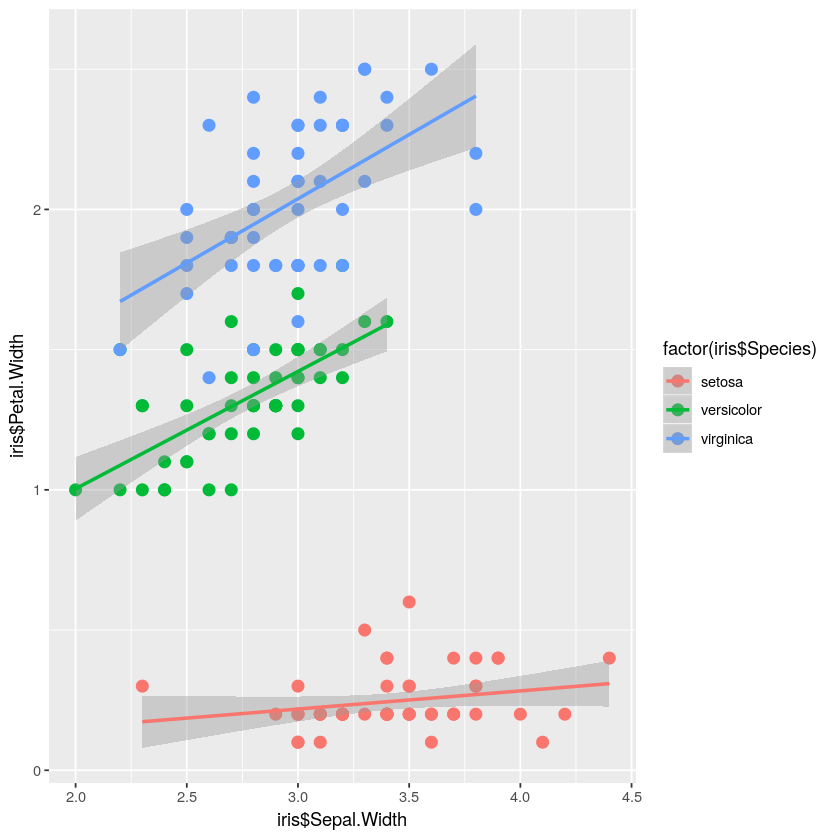

In [213]:
library(ggplot2)

my_plot <- ggplot(
        iris,
        aes(
            iris$Sepal.Width,
            iris$Petal.Width,
            col = factor(iris$Species)
        )
    ) +
    geom_point(size = 3) +
    geom_smooth(method = "lm", size = 1)

print(my_plot)